In [114]:
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple
import random
import threading # Too lazy to wait for simulation.

def verify_sorted(arr: List[int]) -> bool:
    for i in range(1, len(arr)):
        if arr[i-1] > arr[i]:
            return False 
    return True

RAND_SEED = 69

# Context
> In Mergesort, when the sizes of subarrays are small, the overhead of many recursive calls makes the algorithm inefficient. Therefore, in real use, we often combine Mergesort with Insertion Sort to come up with a hybrid sorting algorithm for better efficiency. The idea is to set a small integer S as a threshold for the size of subarrays. Once the size of a subarray in a recursive call of Mergesort is less than or equal to S, the algorithm will switch to Insertion Sort, which is efficient for small-sized input.

# (a) Algorithm implementation: Implement the above hybrid algorithm

## Insertion Sort Implementation

In [ ]:
# def insertion_sort(arr: List[int]) -> Tuple[List[int], int]:
#     key_comparisons = 0
    
#     for i in range(1, len(arr)):
#         for j in range(i - 1, -1, -1):
#             key_comparisons += 1
#             if arr[j+1] >= arr[j]:
#                 break
#             arr[j+1], arr[j] = arr[j], arr[j+1]
#             # prev_j, prev_i = arr[j], arr[j+1]
#             # arr[j], arr[i] = prev_i, prev_j
                
#     return arr, key_comparisons

def insertion_sort(arr):
    key_comparisons = 0
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            key_comparisons += 1
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr, key_comparisons


## Hybrid Merge Sort
Set `S=0` for normal merge sort

In [74]:
# (Sorted, Comparisons)
def hybrid_merge_sort(arr: List[int], S: int = 0) -> Tuple[List[int], int]:
    if len(arr) == 0:
        return ([], 0)
    if len(arr) == 1:
        return ([arr[0]], 0)

    if len(arr) <= S:
        # Copy arr to avoid mutations.
        copy_arr = [x for x in arr]
        return insertion_sort(copy_arr)
    
    # Normal merge sort
    if len(arr) == 2:
        if arr[0] < arr [1]:
            return ([arr[0], arr[1]], 1)
        return ([arr[1], arr[0]], 1)
    
    # Merge
    mid = len(arr) // 2
    merged_left, key_comparisons_left = hybrid_merge_sort(arr[:mid], S)
    merged_right, key_comparisons_right = hybrid_merge_sort(arr[mid:], S)
    lptr, rptr = 0, 0

    result: List[int] = []
    key_comparisons = key_comparisons_left + key_comparisons_right
    while (lptr < len(merged_left) or rptr < len(merged_right)):
        if lptr < len(merged_left) and rptr < len(merged_right):
            key_comparisons += 1
            if merged_left[lptr] < merged_right[rptr]:
                result.append(merged_left[lptr])
                lptr += 1
            else:
                result.append(merged_right[rptr])
                rptr += 1
        elif lptr < len(merged_left):
            result.append(merged_left[lptr])
            lptr += 1
        # rptr must be < len(merged_right)
        else:
            result.append(merged_right[rptr])
            rptr += 1

    return (result, key_comparisons)


## Testing implementation for sort.

In [ ]:
arr = [2, 6, 4, 1, 3, 8, 7, 5]
sorted_arr, comparisons = hybrid_merge_sort(arr)
print(f"Sorted: {sorted_arr}, Key Comparisons: {comparisons}, Is Sorted: {verify_sorted(sorted_arr)}")

arr = [1, 2, 3, 4, 5, 6, 7, 8]
sorted_arr, comparisons = hybrid_merge_sort(arr)
print(f"Sorted: {sorted_arr}, Key Comparisons: {comparisons}, Is Sorted: {verify_sorted(sorted_arr)}")

arr = [1, 3, 2]
sorted_arr, comparisons = hybrid_merge_sort(arr)
print(f"Sorted: {sorted_arr}, Key Comparisons: {comparisons}, Is Sorted: {verify_sorted(sorted_arr)}")

arr = []
sorted_arr, comparisons = hybrid_merge_sort(arr)
print(f"Sorted: {sorted_arr}, Key Comparisons: {comparisons}, Is Sorted: {verify_sorted(sorted_arr)}")



Sorted: [1, 2, 3, 4, 5, 6, 7, 8], Key Comparisons: 16, Is Sorted: True
Sorted: [1, 2, 3, 4, 5, 6, 7, 8], Key Comparisons: 12, Is Sorted: True
Sorted: [1, 2, 3], Key Comparisons: 2, Is Sorted: True
Sorted: [], Key Comparisons: 0, Is Sorted: True


# (b) Generate input data: Generate arrays of increasing sizes, in a range from 1,000 to 10 million. For each of the sizes, generate a random dataset of integers in the range of [1, …, x], where x is the largest number you allow for your datasets.

In [112]:
datasets = []
MAX = 1000000

random.seed(RAND_SEED)
for i in range(1000, 10_000, 100):
    datasets.append([
        random.randint(1, i) for _ in range(i)
    ])

for i in range(10_000, 100_000, 5_000):
    datasets.append([
        random.randint(1, i) for _ in range(i)
    ])

for i in range(100_000, 1_000_000, 100_000):
    datasets.append([
        random.randint(1, i) for _ in range(i)
    ])
    
# +1 inclusive of 10_000_000
# for i in range(1_000_000, 10_000_001, 1_000_000):
#     datasets.append([
#         random.randint(1, i) for _ in range(i)
#     ])

## Measuring implementation key comparisons

In [115]:
tests = [
{
    "S": 0,
    "X": [],
    "Y": [],
    "color": "green"
}, 
{
    "S": 4,
    "X": [],
    "Y": [],
    "color": "orange"
}, 
{
    "S": 8,
    "X": [],
    "Y": [],
    "color": "purple"
}, 
{
    "S": 16,
    "X": [],
    "Y": [],
    "color": "red"
}, 
# {
#     "S": 16,
#     "X": [],
#     "Y": [],
#     "color": "red"
# }, 
# {
#     "S": 32,
#     "X": [],
#     "Y": [],
#     "color": "blue"
# }
]

# Reset seed for fair comparisons for threshold S

def run_test(test):
    x = []
    y = []

    S=test['S']

    random.seed(RAND_SEED)
    print(f"Running test of S={S}")

    for dataset in datasets:
        sorted_arr, comparisons = hybrid_merge_sort(dataset, S)
        print(f"done sorting {len(dataset)}")
        if not verify_sorted(sorted_arr):
            raise ValueError("Array is not sorted")
        x.append(len(dataset))
        y.append(comparisons)
    
    test['X'] = x 
    test['Y'] = y
    
threads = []
for test in tests:
    thread = threading.Thread(target=run_test, args=(test,))
    thread.start()
    threads.append(thread)

for thread in threads:
    thread.join()


Running test of S=0Running test of S=4
done sorting 1000
done sorting 1100
done sorting 1200
done sorting 1300

done sorting 1000
done sorting 1100
done sorting 1400
done sorting 1500
done sorting 1200
done sorting 1300
done sorting 1400
done sorting 1600
done sorting 1700
Running test of S=8
done sorting 1000
done sorting 1100
done sorting 1200
done sorting 1500
done sorting 1600
done sorting 1300
done sorting 1400
done sorting 1500
done sorting 1800
done sorting 1900
done sorting 1700
Running test of S=16
done sorting 1000
done sorting 1100
done sorting 1200
done sorting 1800
done sorting 1900
done sorting 1600
done sorting 1700
done sorting 1800
done sorting 1900
done sorting 1300
done sorting 1400
done sorting 1500
done sorting 2000
done sorting 2100
done sorting 1600
done sorting 1700
done sorting 2000
done sorting 2100
done sorting 2000
done sorting 2200
done sorting 2100
done sorting 2200
done sorting 1800
done sorting 1900
done sorting 2200
done sorting 2300
done sorting 2300
d

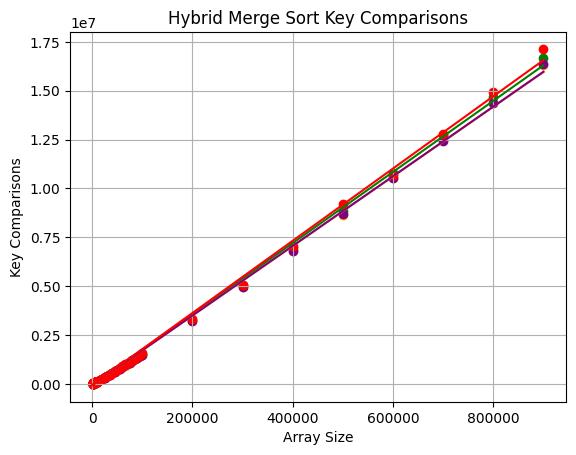

In [ ]:



for test in tests:
    x_values = np.array(test['X'])
    y_values = np.array(test['Y'])
    # Color 
    # Add label
    plt.scatter(x_values, y_values, color=test['color'], label=f'S={test["S"]}')
    slope, intercept = np.polyfit(x_values, y_values, 1)
    plt.plot(x_values, slope * x_values + intercept, color=test['color'], label=f'Slope={slope:.2f}, Intercept={intercept:.2f}')


plt.title('Hybrid Merge Sort Key Comparisons')
plt.xlabel('Array Size')
plt.ylabel('Key Comparisons')
plt.grid(True)
plt.show()
